In [1]:
import pandas as pd
import numpy as np

# Hum visualization libraries bhi abhi se import kar lete hain
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

print("Column names defined.")

Column names defined.


In [5]:
data_path = 'Data/processed.cleveland.data'

df = pd.read_csv(
    data_path, 
    names=column_names, 
    na_values='?', 
    header=None
)

print("Data loaded. First 5 rows:")
print(df.head())

print("\nMissing Values Count:")
print(df.isnull().sum())

Data loaded. First 5 rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Missing Values Count:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [6]:
# 'ca' aur 'thal' ki missing values ko unke mode (most frequent value) se fill karte hain
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

# Verify karte hain, ab count zero hona chahiye
print("\nMissing Values Check after Imputation:")
print(df.isnull().sum())


Missing Values Check after Imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Agar value 0 se zyada hai (1, 2, 3, 4), toh use 1 (Disease Present) kar do.
# Agar 0 hai, toh 0 hi rahne do.
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("\nTransformed Target Variable:")
print(df['target'].value_counts()) # Count dekho 0 aur 1 ki


Transformed Target Variable:
target
0    164
1    139
Name: count, dtype: int64


In [8]:
# Yeh assume kar raha hai ki pichle cells mein df clean ho chuka hai

print("Cleaned DataFrame Information:")
df.info() # Check all dtypes, especially 'ca' and 'thal', should ideally be int/float now

print("\nStatistical Summary of Numerical Features:")
print(df.describe())

Cleaned DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

Statistical Summary of Numerical Features:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.0000

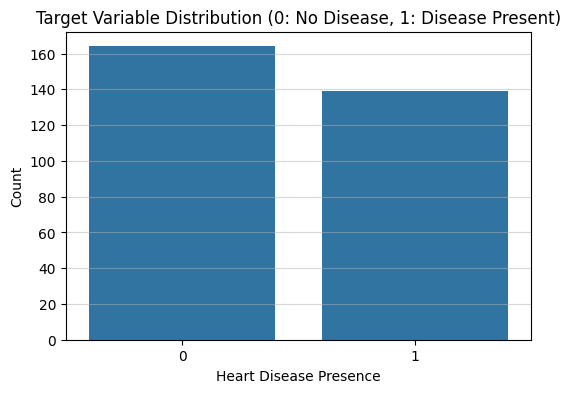

In [10]:
# Class Balance Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution (0: No Disease, 1: Disease Present)')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)
plt.savefig('Data/target_distribution.png') # Visualization ko 'data' folder mein save karna best practice hai
plt.show()

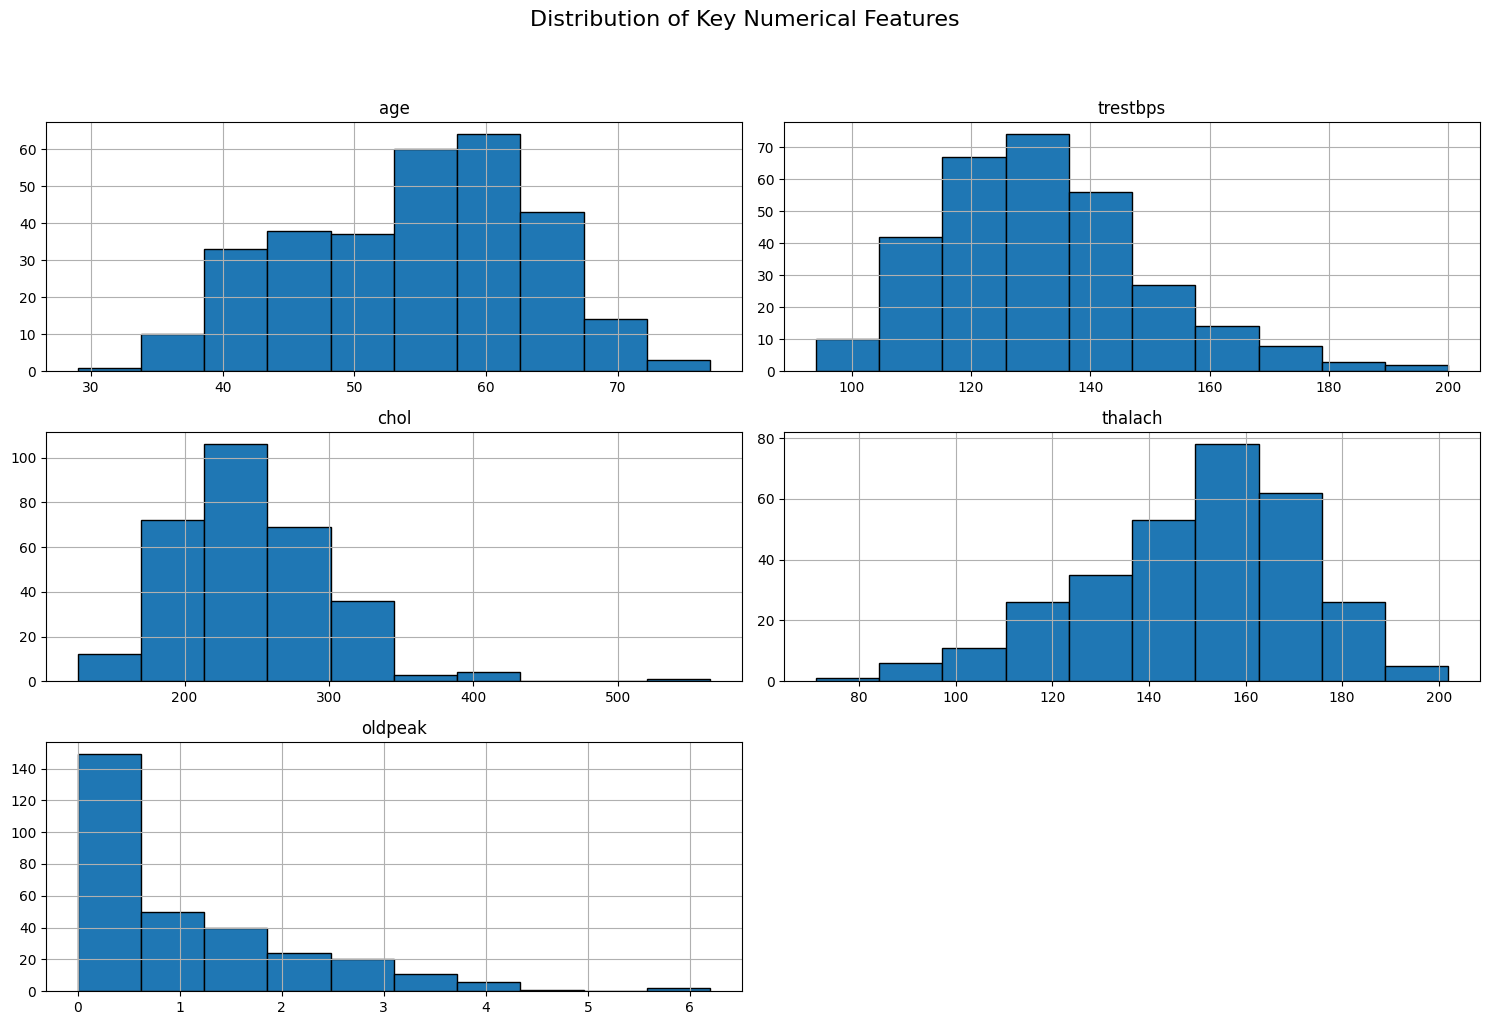

In [11]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df[numerical_features].hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.suptitle('Distribution of Key Numerical Features', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('Data/numerical_feature_histograms.png')
plt.show()

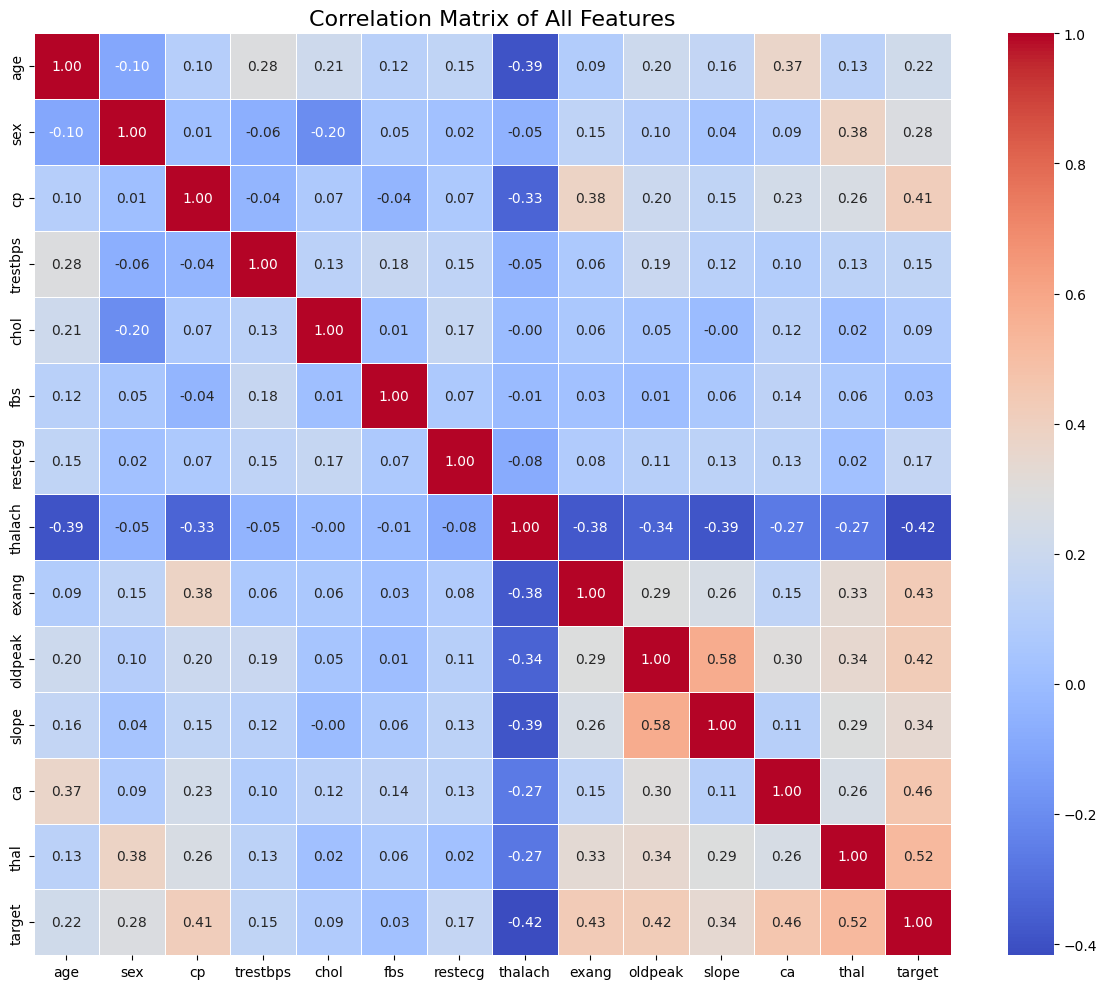

In [12]:
# Correlation Matrix calculate karo
corr_matrix = df.corr()

# Heatmap plot karo
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True,    # Values dikhaao
    fmt='.2f',     # Two decimal places
    cmap='coolwarm', # Color scheme
    cbar=True,
    linewidths=0.5
)
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.tight_layout()
plt.savefig('Data/correlation_heatmap.png')
plt.show()